<center> <h1>Exploratory Data Analysis on Sales Data</h1></center>

## Overview
#### Analyze a sales dataset to uncover trends, seasonal patterns, and key performance metrics. Identify factors affecting sales performance, including top-performing products and seasonal variations.


## Import Required Libraries

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from datetime import datetime

# Attempt to import statsmodels and handle errors
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
except ModuleNotFoundError:
    print("Warning: 'statsmodels' module not found. Install it using 'pip install statsmodels' if needed.")

## Set Visualization Style

In [39]:
# Set style
plt.style.use('seaborn-whitegrid')  # Fixed style name
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)


## Load CSV File and Check If Exists

In [20]:
# File path
file_path = "sales_data_sample.csv"

# Check if file exists before proceeding
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

print("Loading and preparing data for final report...")
df = pd.read_csv(file_path, encoding='ISO-8859-1')


Loading and preparing data for final report...


## Basic Cleaning and Handling Date Column

In [21]:
# Basic cleaning
try:
    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
except KeyError:
    raise KeyError("Missing 'ORDERDATE' column in the dataset.")


## Convert Numeric Columns

In [22]:
# Convert numeric columns safely
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


## Create Time-Based Features

In [23]:
# Create time-based features
df['MONTH'] = df['ORDERDATE'].dt.month
df['YEAR'] = df['ORDERDATE'].dt.year
df['QUARTER'] = df['ORDERDATE'].dt.quarter
df['MONTH_NAME'] = df['ORDERDATE'].dt.strftime('%b')
df['MONTH_YEAR'] = df['ORDERDATE'].dt.strftime('%Y-%m')

## Step 1 - Data Loading and Cleaning

In [30]:
print("\nData Loading and Cleaning")
print("-" * 50)
print(f"Total Records: {df.shape[0]:,}")
print(f"Date Range: {df['ORDERDATE'].min().strftime('%Y-%m-%d')} to {df['ORDERDATE'].max().strftime('%Y-%m-%d')}")



Data Loading and Cleaning
--------------------------------------------------
Total Records: 2,823
Date Range: 2003-01-06 to 2005-05-31


## Step 2 - Summary Statistics

In [31]:
print("\nSummary Statistics")
print("-" * 50)
print(df.describe())


Summary Statistics
--------------------------------------------------
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  \
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000   
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551   
std     1841.865106     1.203878     3.656633     0.69967    40.187912   
mi

## Step 3 - Monthly Sales Trend Visualization


Data Visualization


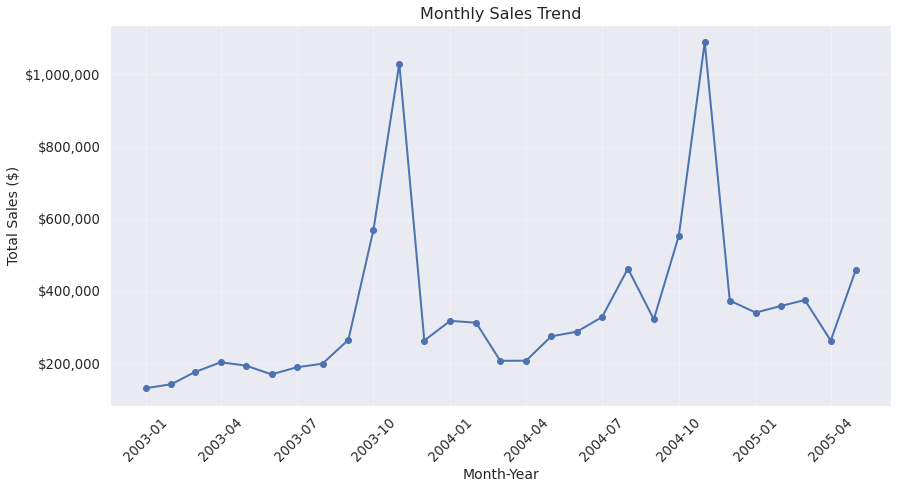

In [32]:
print("\nData Visualization")
plt.figure(figsize=(14, 7))

# Ensure correct sorting of MONTH_YEAR
df['MONTH_YEAR'] = pd.to_datetime(df['MONTH_YEAR'])
monthly_sales = df.groupby('MONTH_YEAR')['SALES'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('MONTH_YEAR')

plt.plot(monthly_sales['MONTH_YEAR'], monthly_sales['SALES'], marker='o', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(True, alpha=0.3)
plt.show()

## Step 4 - Seasonal Patterns Analysis


Seasonal Patterns Analysis



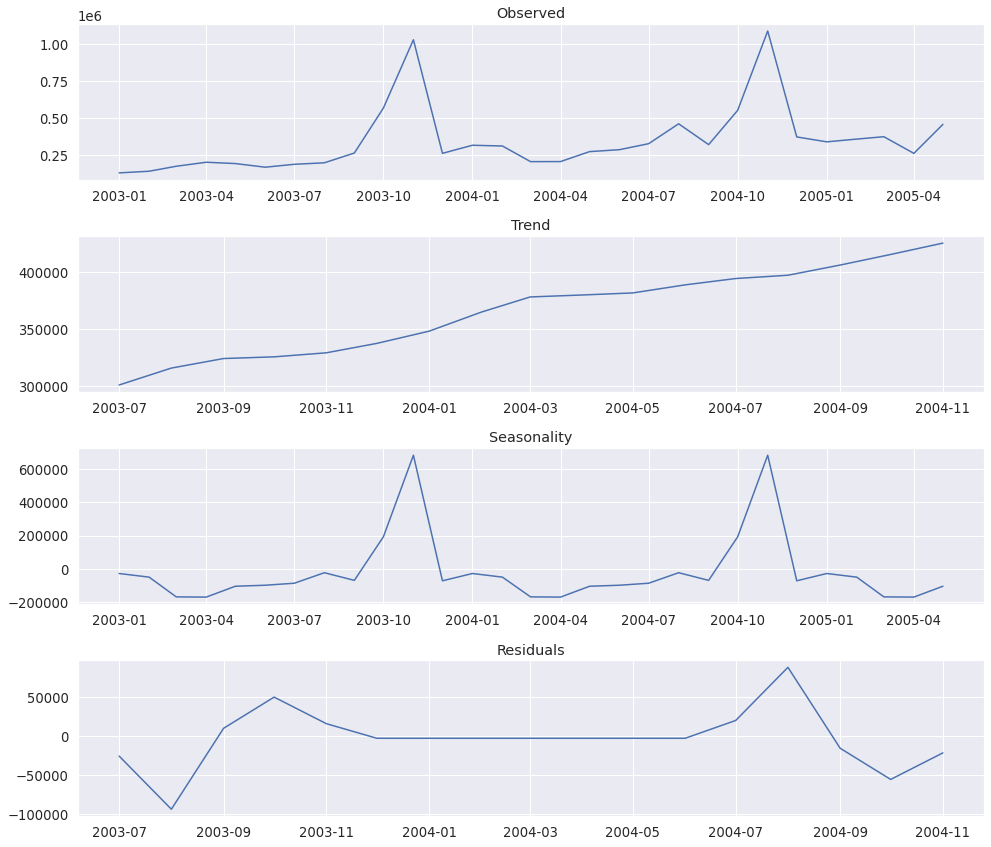

In [35]:
print("\nSeasonal Patterns Analysis\n")

# Ensure time series data has at least 12 months for decomposition
monthly_ts = df.groupby('MONTH_YEAR')['SALES'].sum()
monthly_ts.index = pd.to_datetime(monthly_ts.index)
monthly_ts = monthly_ts.sort_index()

if len(monthly_ts) >= 12:
    if 'seasonal_decompose' in globals():
        decomposition = seasonal_decompose(monthly_ts, model='additive', period=12)
        plt.figure(figsize=(14, 12))
        plt.subplot(411)
        plt.plot(decomposition.observed)
        plt.title('Observed')
        plt.subplot(412)
        plt.plot(decomposition.trend)
        plt.title('Trend')
        plt.subplot(413)
        plt.plot(decomposition.seasonal)
        plt.title('Seasonality')
        plt.subplot(414)
        plt.plot(decomposition.resid)
        plt.title('Residuals')
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping seasonal decomposition (statsmodels module not available).")


## Step 5 - Product Performance Analysis

In [36]:
print("\nProduct Performance Analysis\n")

if 'PRODUCTLINE' in df.columns:
    product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
    print(product_sales)
else:
    print("Warning: 'PRODUCTLINE' column not found in dataset.")



Product Performance Analysis

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


## Step 6 - Final Report and Key Insights

In [37]:
print("\nFinal Report and Key Insights")
print("-" * 50)
print(f"Total Sales: ${df['SALES'].sum():,.2f}")
print(f"Average Order Value: ${df['SALES'].mean():,.2f}")

# Ensure 'PRODUCTLINE' exists before finding top product
if 'PRODUCTLINE' in df.columns:
    top_product = df.groupby('PRODUCTLINE')['SALES'].sum().idxmax()
    print(f"Top Product Line: {top_product}")

# Ensure 'MONTH_NAME' exists before finding best month
if 'MONTH_NAME' in df.columns:
    best_month = df.groupby('MONTH_NAME')['SALES'].sum().idxmax()
    print(f"Best Performing Month: {best_month}")

print("\nFinal report generated successfully!")



Final Report and Key Insights
--------------------------------------------------
Total Sales: $10,032,628.85
Average Order Value: $3,553.89
Top Product Line: Classic Cars
Best Performing Month: Nov

Final report generated successfully!
